<a href="https://colab.research.google.com/github/pnistha11/Data-Analysis-Projects/blob/main/E_commerce_Furniture_Dataset_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **E-commerce Furniture Dataset 2024**

**Objectives**

* Understand sales patterns of furniture products in an e‑commerce platform.

* Clean and preprocess raw e‑commerce data for analysis.

* Explore relationships between price, original price, and sales volume.

* Convert categorical product information into numerical features.

* Build regression models to predict product sales.

* Compare multiple machine‑learning models and identify the best‑performing one.

* Interpret feature importance to understand key drivers of sales.




# Data Collection

In [ ]:
!pip install opendatasets --quiet
import opendatasets as od
import pandas as pd
od.download("https://www.kaggle.com/datasets/kanchana1990/e-commerce-furniture-dataset-2024")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nisthapatel11
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kanchana1990/e-commerce-furniture-dataset-2024


100%|██████████| 81.2k/81.2k [00:00<00:00, 167MB/s]

In [ ]:
df = pd.read_csv("/content/e-commerce-furniture-dataset-2024/ecommerce_furniture_dataset_2024.csv")
df.head()


,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [ ]:
print(df.shape)
print(df.info())
print(df.isnull().sum())

(2000, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        1997 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB
None
productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64


# Data Preprocessing

In [ ]:
#convert price into float
df["price"] = df["price"].replace(r"[\$,]", "", regex=True).astype(float)
df["originalPrice"] = df["originalPrice"].replace(r"[\$,]", "", regex=True).astype(float)

In [ ]:
# Fill missing values
df["price"].fillna(df["price"].median())
df["originalPrice"].fillna(df["originalPrice"].median())
df["sold"].fillna(0)

df["tagText"].fillna("Unknown")
df["productTitle"].fillna("Unknown Product")

,productTitle
0,Dresser For Bedroom With 9 Fabric Drawers Ward...
1,Outdoor Conversation Set 4 Pieces Patio Furnit...
2,Desser For Bedroom With 7 Fabric Drawers Organ...
3,"Modern Accent Boucle Chair,Upholstered Tufted ..."
4,Small Unit Simple Computer Desk Household Wood...
...,...
1995,Modern TV Stand Entertainment Center with Two ...
1996,"Large Wardrobe Armoire Closet with 3 Doors, Fr..."
1997,"Velvet Futon Sofa Bed, 73-inch Sleeper Couch w..."
1998,Furniture Acrylic Coffee Table Transparent Liv...


In [ ]:
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productTitle   2000 non-null   object 
 1   originalPrice  487 non-null    float64
 2   price          2000 non-null   float64
 3   sold           2000 non-null   int64  
 4   tagText        1997 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 78.3+ KB
None
                                        productTitle  originalPrice   price  \
0  Dresser For Bedroom With 9 Fabric Drawers Ward...            NaN   46.79   
1  Outdoor Conversation Set 4 Pieces Patio Furnit...            NaN  169.72   
2  Desser For Bedroom With 7 Fabric Drawers Organ...          78.40   39.46   
3  Modern Accent Boucle Chair,Upholstered Tufted ...            NaN  111.99   
4  Small Unit Simple Computer Desk Household Wood...          48.82   21.37   
5  3 Pieces Patio Furniture Set, Outdoor Swi

In [ ]:
# Outlier handling using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

df = remove_outliers_iqr(df, "price")
df = remove_outliers_iqr(df, "originalPrice")
df = remove_outliers_iqr(df, "sold")

# Exploratory Data Analysis (EDA)

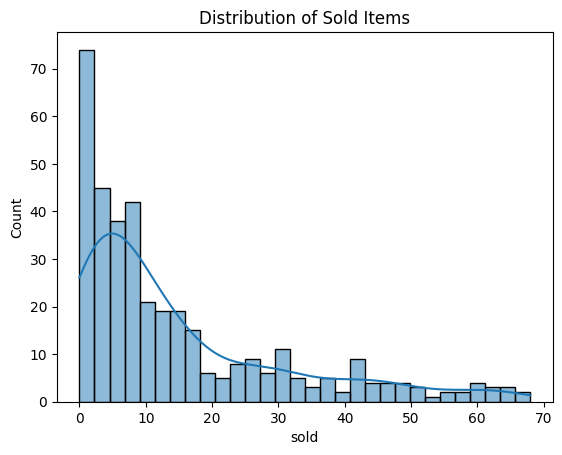

In [ ]:
#Distribution of sales

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.histplot(df["sold"],  kde=True,bins=30)
plt.title("Distribution of Sold Items")
plt.show()

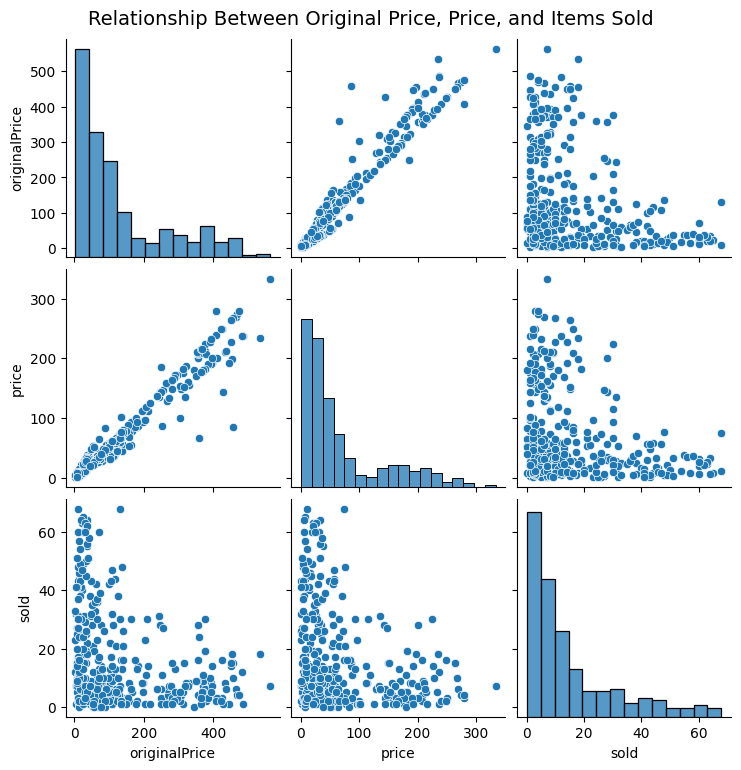

In [ ]:
# Original parice VS Price VS Sold
#plt.figure()
g = sns.pairplot(
    df,
    vars=['originalPrice', 'price', 'sold'],
    kind='scatter'
)

# Proper title for pairplot
g.fig.suptitle(
    'Relationship Between Original Price, Price, and Items Sold',
    y=1.02, fontsize=14
)

plt.show()

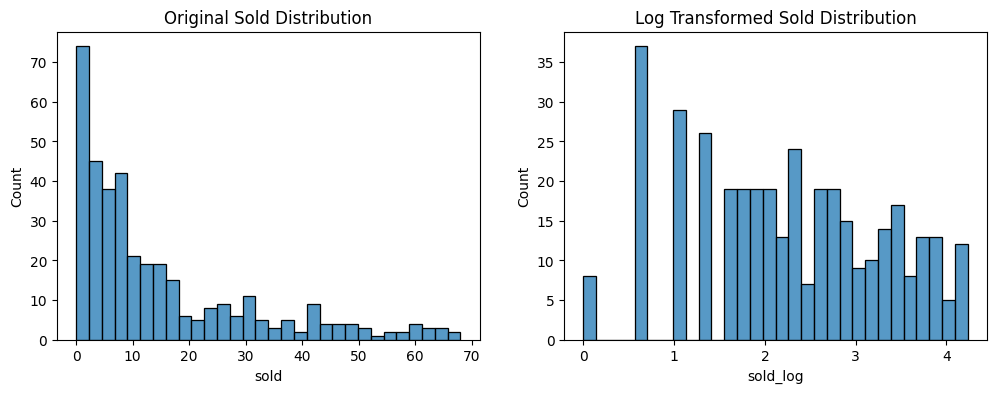

In [ ]:
# Log transformation to reduce skewness
import numpy as np

df["sold_log"] = np.log1p(df["sold"])

# Compare distributions
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df["sold"], bins=30)
plt.title("Original Sold Distribution")

plt.subplot(1,2,2)
sns.histplot(df["sold_log"], bins=30)
plt.title("Log Transformed Sold Distribution")

plt.show()


# Feature Engineering

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# 1. Encode tagText (categorical, small categories)
le = LabelEncoder()
df["tagText_enc"] = le.fit_transform(df["tagText"])

# 2. TF-IDF for productTitle (text data)
tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=300
)
X_title = tfidf.fit_transform(df["productTitle"])

# 3. Numeric features
X_numeric = df[["price", "originalPrice", "tagText_enc"]]

# 4. Combine numeric + TF-IDF features
X = hstack([X_numeric.values, X_title])

# 5. Log transform target variable
y = np.log1p(df["sold"])

print("Feature matrix shape:", X.shape)
print("Target shape:", y.shape)

Feature matrix shape: (374, 303)
Target shape: (374,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model Selection & Training

***Train–Test Split***

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

***Model 1: Linear Regression***

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

***Model 2: Random Forest Regressor***

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

***Tuned Random Forest***

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


***Model 3: Decision Tree Regressor***

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

***Gradient Boosting Regressor***

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

***XGBoost Regressor***

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

def evaluate(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }

results = pd.DataFrame({
    "Gradient Boosting": evaluate(y_test, y_pred_gbr),
    "XGBoost": evaluate(y_test, y_pred_xgb),
    "Tuned Random Forest": evaluate(y_test, y_pred_best_rf)
})

results


,Gradient Boosting,XGBoost,Tuned Random Forest
MAE,0.746138,0.750858,0.777751
RMSE,0.910829,0.947450,0.958615
R2,0.118732,0.046443,0.023837


# Model Comparison (Graphs)

***R² Score Comparison***

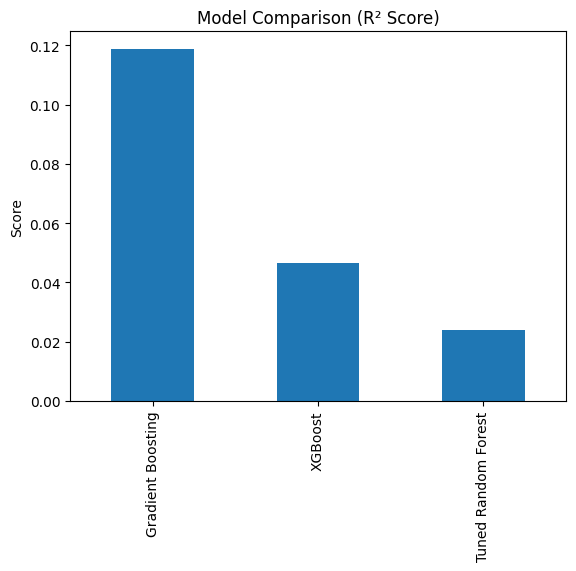

In [ ]:
results.loc["R2"].plot(kind="bar")
plt.title("Model Comparison (R² Score)")
plt.ylabel("Score")
plt.show()

***RMSE Comparison***

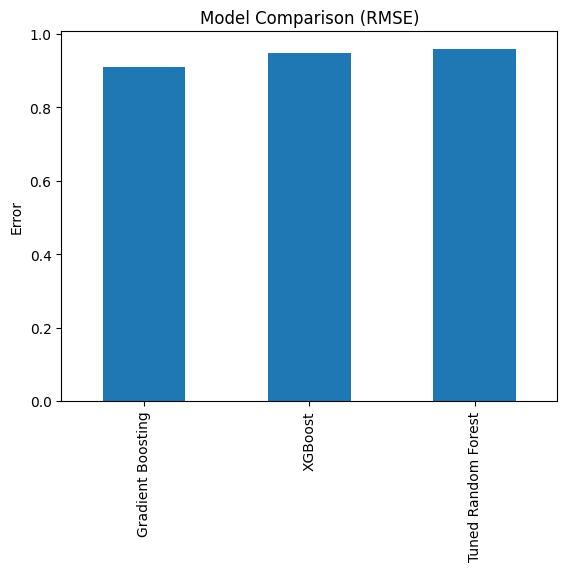

In [ ]:
results.loc["RMSE"].plot(kind="bar")
plt.title("Model Comparison (RMSE)")
plt.ylabel("Error")
plt.show()

***Actual vs Predicted***

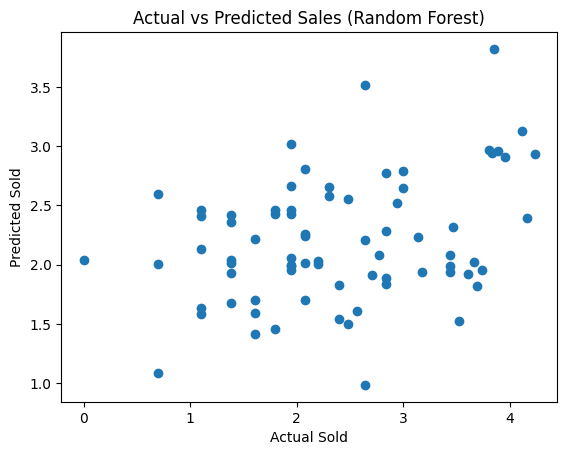

In [ ]:
plt.figure()
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Sold")
plt.ylabel("Predicted Sold")
plt.title("Actual vs Predicted Sales (Random Forest)")
plt.show()

# Feature Importance (Random Forest)

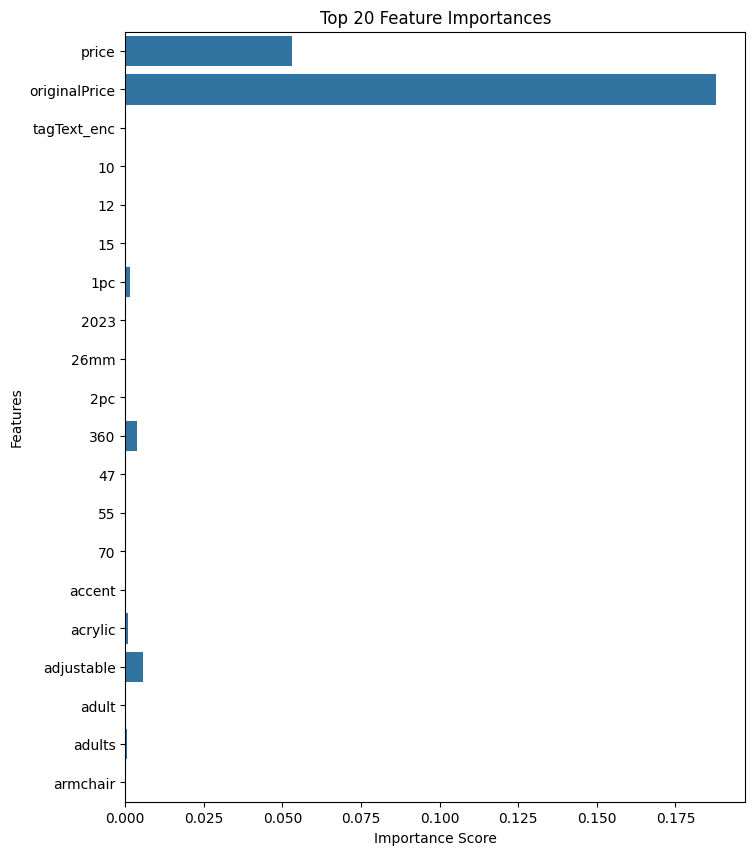

In [ ]:
# Numeric feature names
numeric_features = ["price", "originalPrice", "tagText_enc"]

# TF-IDF feature names
tfidf_features = tfidf.get_feature_names_out()

# Combine all feature names
feature_names = np.concatenate([numeric_features, tfidf_features])

# Feature importance from Random Forest
importance = best_rf.feature_importances_

# Plot
plt.figure(figsize=(8, 10))
sns.barplot(x=importance[:20], y=feature_names[:20])
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred):
    print("MAE :", mean_absolute_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2  :", r2_score(y_true, y_pred))

evaluate_model(y_test, y_pred_gbr)

MAE : 0.7461376011199828
RMSE: 0.9108290953094038
R2  : 0.1187324990236508
